# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [2]:
import pandas as pd
import numpy as np

In [3]:
transactions = pd.read_csv("../project_data/project_transactions.csv")

In [4]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


## downcasting

In [47]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [48]:
cols = ['DAY','QUANTITY','STORE_ID','WEEK_NO']
transactions.loc[:,cols].max()


DAY           711
QUANTITY    89638
STORE_ID    34280
WEEK_NO       102
dtype: int64

In [49]:
transactions = transactions.astype({
    'DAY':'Int16',
     'QUANTITY':'Int32',
      'STORE_ID':'Int32',
       'WEEK_NO' : 'Int8'
})
transactions.info(show_counts=True,memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   household_key      2146311 non-null  int64  
 1   BASKET_ID          2146311 non-null  int64  
 2   DAY                2146311 non-null  Int16  
 3   PRODUCT_ID         2146311 non-null  int64  
 4   QUANTITY           2146311 non-null  Int32  
 5   SALES_VALUE        2146311 non-null  float64
 6   STORE_ID           2146311 non-null  Int32  
 7   RETAIL_DISC        2146311 non-null  float64
 8   WEEK_NO            2146311 non-null  Int8   
 9   COUPON_DISC        2146311 non-null  float64
 10  COUPON_MATCH_DISC  2146311 non-null  float64
dtypes: Int16(1), Int32(2), Int8(1), float64(4), int64(3)
memory usage: 145.3 MB


In [50]:
#find missing_value
find_missing_Value = transactions.isna().sum()
find_missing_Value


household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [51]:
#find unique household and product_Id
unique_household_key= transactions.loc[:,['household_key','PRODUCT_ID']].nunique()
unique_household_key

household_key     2099
PRODUCT_ID       84138
dtype: int64

## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [5]:
transactions = transactions.assign(
    total_discount = transactions['RETAIL_DISC']+ transactions['COUPON_DISC'],
    percentage_discount = lambda x: (x['total_discount']/ x['SALES_VALUE']).abs()
)
transactions['percentage_discount'] = np.where(transactions['percentage_discount']>1,1.0,
                                               np.where(transactions['percentage_discount']<0,0.0,transactions['percentage_discount']))
transactions.drop(['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'],axis=1,inplace=True)
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000
...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,0.00,0.000000
2146307,1598,42305362535,711,114102,1,8.89,3228,102,0.00,0.000000
2146308,1598,42305362535,711,133449,1,6.99,3228,102,0.00,0.000000
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,-0.49,0.108889


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [22]:
total_sales = transactions.loc[:,'SALES_VALUE'].sum()
total_sales

6666243.499999999

In [20]:
total_discount = transactions.loc[:,'total_discount'].sum()
total_discount

-1178658.0799999998

In [23]:
overall_percentage = total_discount/total_sales
overall_percentage

-0.1768099350106248

In [24]:
total_quantity = transactions.loc[:,'QUANTITY'].sum()
total_quantity

216713611

In [25]:
transactions.loc[:,'QUANTITY'].max()

89638

In [26]:
transactions.loc[:,'QUANTITY'].value_counts()

QUANTITY
1        1696926
2         307303
3          55069
4          31924
0          11941
          ...   
11152          1
18558          1
8014           1
10380          1
3989           1
Name: count, Length: 10593, dtype: int64

In [27]:
max_quantity = transactions['QUANTITY'].max()
max_quantity

89638

In [28]:
transactions[transactions['QUANTITY']==max_quantity]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
1442095,630,34749153595,503,6534178,89638,250.0,384,73,-13.45,0.0538


In [ ]:
# no this row is not high percentage relative to average discount on this row only -13.45 disocount but overall
# discount is -0.17

In [29]:
total_sales_values_per_basket = total_sales/transactions['BASKET_ID'].nunique()
total_sales_values_per_basket

28.61797938516092

In [30]:
total_sales_values_household_key = total_sales/transactions['household_key'].nunique()
total_sales_values_household_key

3175.9140066698424

## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


In [31]:
# plot the distribution of total sales value purchased at the household level
household_distribution = transactions.groupby('household_key').agg({'SALES_VALUE':'sum'})
household_distribution

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


<Axes: ylabel='Frequency'>

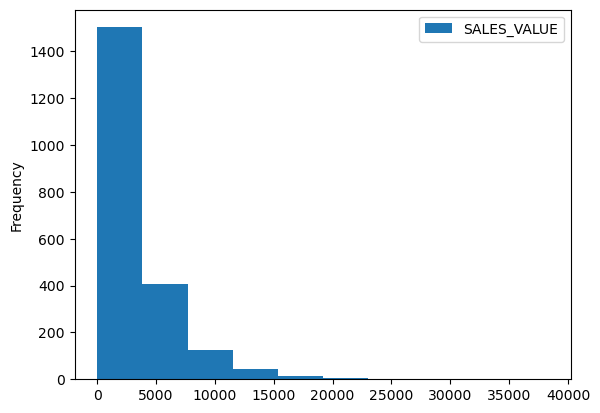

In [32]:
household_distribution.plot.hist()

In [89]:
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000
...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,0.00,0.000000
2146307,1598,42305362535,711,114102,1,8.89,3228,102,0.00,0.000000
2146308,1598,42305362535,711,133449,1,6.99,3228,102,0.00,0.000000
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,-0.49,0.108889


In [33]:
# top 10 households by quantity purchased
top_10_household_quantity = transactions.groupby('household_key')[['QUANTITY']].sum().sort_values('QUANTITY',ascending=False).iloc[:10]
top_10_household_quantity

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [108]:
# top10_houehold_Sales value 
top_10_household_Sales = transactions.groupby('household_key')[['SALES_VALUE']].sum().sort_values('SALES_VALUE',ascending=False).iloc[:10]
top_10_household_Sales

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


<Axes: xlabel='household_key'>

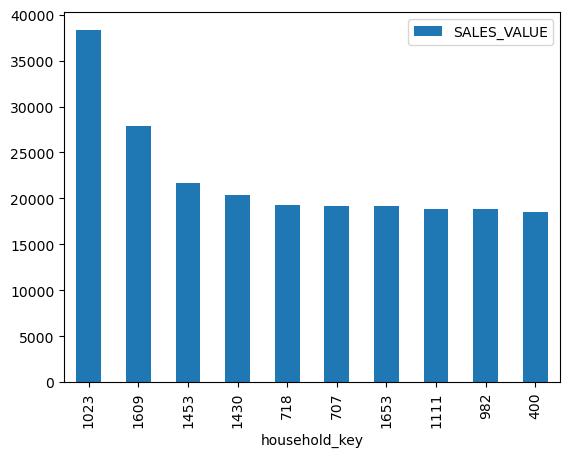

In [40]:
top_10_household_Sales.plot.bar()

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

In [90]:
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000
...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,0.00,0.000000
2146307,1598,42305362535,711,114102,1,8.89,3228,102,0.00,0.000000
2146308,1598,42305362535,711,133449,1,6.99,3228,102,0.00,0.000000
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,-0.49,0.108889


In [67]:
top10_products= transactions.groupby('PRODUCT_ID')[['SALES_VALUE']].sum().sort_values('SALES_VALUE',ascending=False).iloc[:10]
top10_products

top10_products.index

Index([6534178, 6533889, 1029743, 1082185, 6533765, 6534166, 1106523,  916122,
        995242, 5569230],
      dtype='int64', name='PRODUCT_ID')

<Axes: ylabel='PRODUCT_ID'>

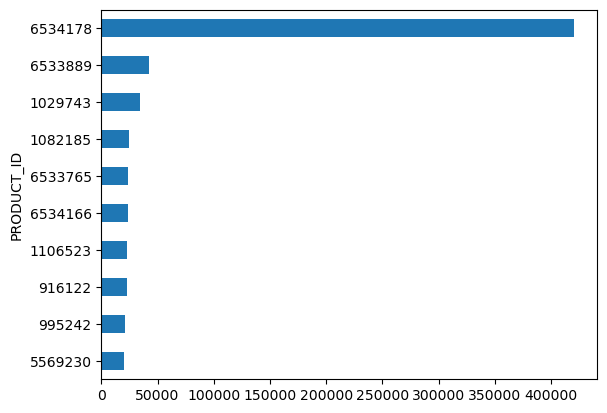

In [92]:
top10_products['SALES_VALUE'].sort_values().plot.barh()

In [98]:
#Did the top 10 selling items have a higher than average discount rate?
# Calculate the total discount for top 10 products
# Divide that by sales value for top 10 products

((transactions
 .query("PRODUCT_ID in @top10_products.index")
 .loc[: ,"total_discount"]
 .sum()) 
/(transactions
 .query("PRODUCT_ID in @top10_products.index")
 .loc[: ,"SALES_VALUE"]
  .sum())
)

-0.10331267387397927

In [113]:
# Look up top 10 products for households in top10_value table
# Use query to reference index of top10_value to filter to relevant households
# Use value counts to get counts by product_id (this will be order in descending order)
# Then grab the top 10 products with iloc and extract the index to get product numbers

# top_hh_products = (transactions
#                    .query("household_key in @top_10_household_Sales.index")
#                    .loc[:, "PRODUCT_ID"]
#                    .value_counts()
#                    .iloc[:10]
#                    .index
#                   )

# top_hh_products

top_hh_products = (transactions
                   .query("household_key in @top_10_household_Sales.index")
                   .loc[:, "PRODUCT_ID"]
                   .value_counts()
                   .iloc[:10].index
                   )

top_hh_products

Index([1082185, 1029743, 6534178, 6533889, 1127831,  951590,  860776, 1106523,
        981760, 9677202],
      dtype='int64', name='PRODUCT_ID')

In [116]:
product = pd.read_csv("../project_data/product.csv")
product

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [117]:
product.query("PRODUCT_ID in @top_hh_products")


,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [93]:
product = product.query("PRODUCT_ID in @top10_products.index")
product

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [84]:
# find
product[product['PRODUCT_ID']==6534178]

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
